In [22]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import json
import spikeinterface.full as si
from probeinterface import read_probeinterface
from probeinterface.plotting import plot_probe
from adc_shifts import adc_shifts

%matplotlib widget

In [23]:
# Data loading
num_channels = 384
# sampling_frequency = 29999.954846
# sampling_frequency = 30000
# sampling_frequency = 2500
# see this thread https://community.brain-map.org/t/using-the-raw-data/1898 for gain scaling factor and dtype
gain_recording = -1.171875
offset_recording = 600
# gain_recording = -23.4
# offset_recording = 1200
# gain_recording = 0.195
# offset_recording = 0
dtype = np.int16

In [24]:
# Main working directory
base_folder = Path.home() / 'RANCZLAB-NAS' / 'vestibular-vr_2024-01-17T144340Z'
# base_folder = Path.home() / 'RANCZLAB-NAS' / 'iakov/data/sid_715093703_pid_810755797'

# Input data
# binary_filename = 'LFP.bin'
binary_filename = 'SpikeData.bin'
# binary_filename = 'spike_band.dat'

In [25]:
recordings = {}
recordings['raw'] = si.read_binary(base_folder / binary_filename, sampling_frequency=sampling_frequency, dtype=dtype, num_channels=num_channels, gain_to_uV=1.0, offset_to_uV=0)
recordings['raw'] = si.scale(recordings['raw'], gain=gain_recording, offset=offset_recording) #scale to uV
recordings['raw']

ScaleRecording: 384 channels - 30.0kHz - 1 segments - 16,642,440 samples - 554.75s (9.25 minutes) 
                float32 dtype - 23.81 GiB

In [26]:
si.plot_traces(recordings['raw'], mode='map', time_range=[0, 0.1], backend='ipywidgets', height_cm=25, width_cm=60)

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [27]:
from elephant.spectral import welch_psd

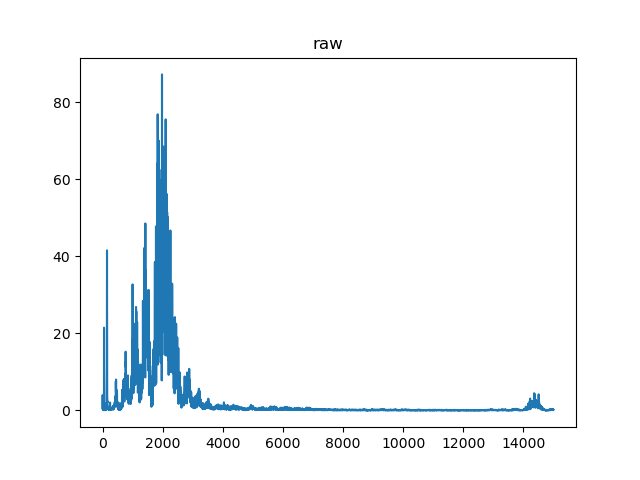

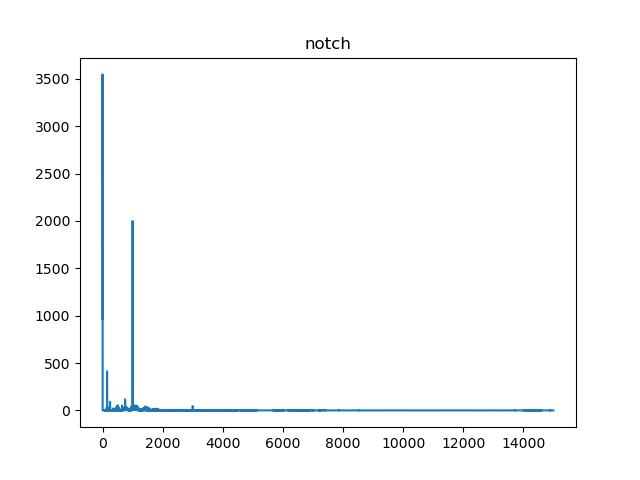

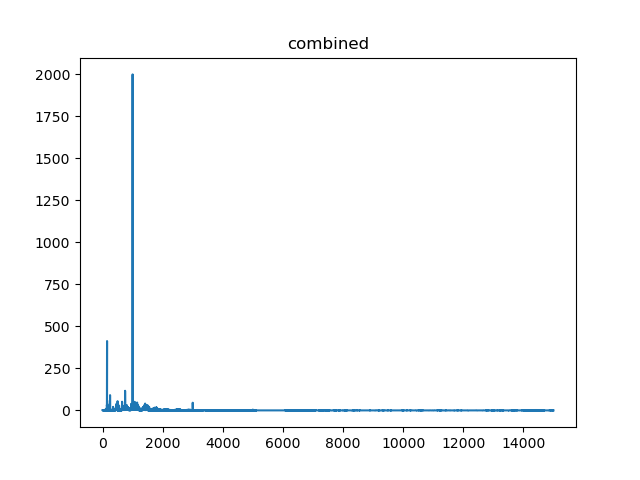

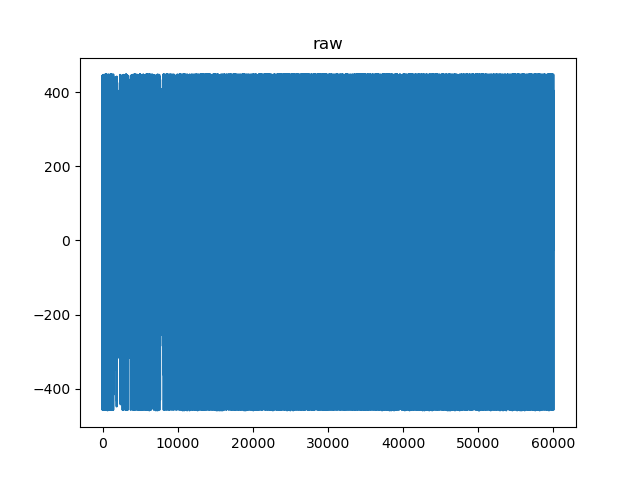

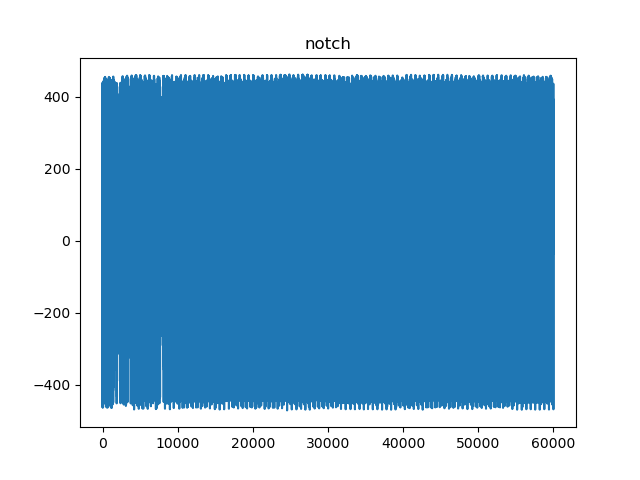

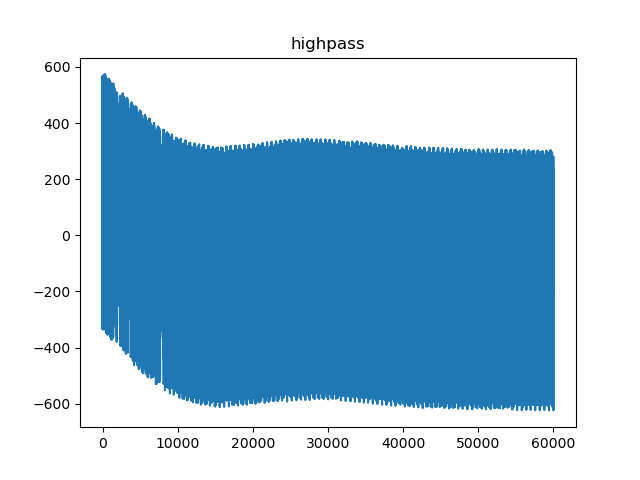

In [31]:
recording = recordings['raw'].get_traces(channel_ids=[100], start_frame=0, end_frame=60000)[:,0]
notch_recording = si.notch_filter(recordings['raw'], freq=50, q=10).get_traces(channel_ids=[100], start_frame=0, end_frame=100*30000)[:,0]
highpass_recording = si.highpass_filter(recordings['raw'], freq_min=1).get_traces(channel_ids=[100], start_frame=0, end_frame=100*30000)[:,0]
combined_rec = si.highpass_filter(si.notch_filter(recordings['raw'], freq=50, q=10), freq_min=1).get_traces(channel_ids=[100], start_frame=0, end_frame=100*30000)[:,0]

f, psd = welch_psd(recording, fs=sampling_frequency)
plt.figure()
plt.title('raw')
plt.plot(f,psd)
plt.show()

f, psd = welch_psd(notch_recording, fs=sampling_frequency)
plt.figure()
plt.title('notch')
plt.plot(f,psd)
plt.show()

f, psd = welch_psd(combined_rec, fs=sampling_frequency)
plt.figure()
plt.title('combined')
plt.plot(f,psd)
plt.show()

plt.figure()
plt.title('raw')
plt.plot(recording[:60000])
plt.show()

plt.figure()
plt.title('notch')
plt.plot(notch_recording[:60000])
plt.show()

plt.figure()
plt.title('highpass')
plt.plot(combined_rec[:60000])
plt.show()

In [ ]:
trace = recordings['raw'].get_traces(0)
trace.shape

In [ ]:
trace[:2500,0].shape

In [ ]:
# np.save('lfp_trace.npy',trace)

In [ ]:
plt.figure()
plt.plot(trace[:2500,100])
plt.show()